# SF3B4
[Nager type of acrofacial dysostosis (AFD1)](https://omim.org/entry/154400)  is caused by heterozygous mutation in the SF3B4 gene.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using gpsea version 0.9.2


### SF3B4
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SF3B4.

In [2]:
gene_symbol = 'SF3B4'
mane_tx_id = 'NM_005850.5'
mane_protein_id = 'NP_005841.1' # splicing factor 3B subunit 4 [Homo sapiens]

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.23') as ps:
        phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc_results = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
qc_results.summarize()

Individuals Processed: 100%|██████████| 26/26 [00:34<00:00,  1.32s/ individuals]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
23,Micrognathia
20,Downslanted palpebral fissures
19,Hearing impairment
17,Midface retrusion
15,Abnormal pinna morphology
14,Radioulnar synostosis
10,Abnormal thumb morphology
7,Absent thumb
6,Absent lower eyelashes
5,Short thumb


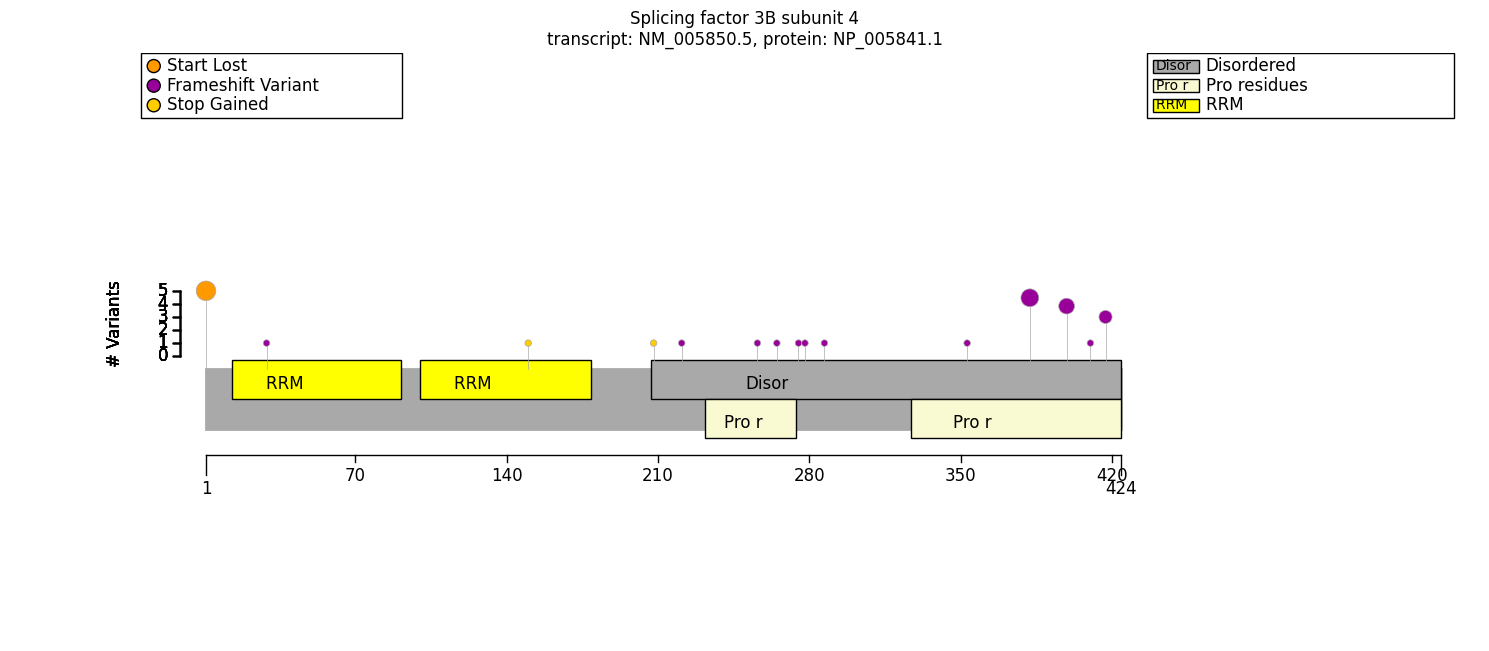

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

sf3b4_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
sf3b4_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.model.genome import Region
from gpsea.analysis.clf import  monoallelic_classifier
from gpsea.analysis.predicate import variant_key
from gpsea.view import MtcStatsViewer

pMet1 = variant_key(key="1_149927759_149927759_T_C") #c.1A>G; p.Met1?	

pMet1_clf = monoallelic_classifier(
    a_predicate=pMet1, 
    b_predicate=~ pMet1, 
    a_label="p.Met1?",
    b_label= "Other")	
rpMet1_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=pMet1_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(rpMet1_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,10
HMF03,Skipping term because of a child term with the same individual counts,8
HMF08,Skipping general term,47
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,127


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=rpMet1_result)

Allele group                                       p.Met1?          Other  \
                                                     Count Percent  Count   
Hearing impairment [HP:0000365]                        4/5     80%  15/15   
Downslanted palpebral fissures [HP:0000494]            4/4    100%  16/17   
Slanting of the palpebral fissure [HP:0200006]         4/4    100%  16/16   
Abnormal eyelid morphology [HP:0000492]                4/4    100%  18/18   
Abnormal ocular adnexa morphology [HP:0030669]         4/4    100%  18/18   
Micrognathia [HP:0000347]                              5/5    100%  18/19   
Aplasia/Hypoplasia of the mandible [HP:0009118]        5/5    100%  18/18   
Abnormal axial skeleton morphology [HP:0009121]        5/5    100%  18/18   
Aplasia/hypoplasia involving the skeleton [HP:0...     5/5    100%  19/19   
Abnormal mandible morphology [HP:0000277]              5/5    100%  18/18   
Hearing abnormality [HP:0000364]                       4/4    100%  15/15   
Abnormal pinna morphology [HP:0000377]                 3/3    100%  15/15   
Absent lower eyelashes [HP:0007646]                    1/3     33%   5/11   
Sparse or absent eyelashes [HP:0200102]                2/2    100%    9/9   
Abnormal eyelash morphology [HP:0000499]               2/2    100%    9/9   
Abnormal hair quantity [HP:0011362]                    2/2    100%    9/9   
Aplasia/Hypoplasia of the thumb [HP:0009601]           1/1    100%  11/11   
Aplasia/Hypoplasia of fingers [HP:0006265]             1/1    100%  12/12   
Aplasia/hypoplasia involving bones of the hand ...     1/1    100%  12/12   
Aplasia/hypoplasia involving bones of the upper...     1/1    100%  13/13   
Aplasia/hypoplasia involving bones of the extre...     1/1    100%  13/13   
Aplasia/hypoplasia of the extremities [HP:0009815]     1/1    100%  13/13   
Abnormal appendicular skeleton morphology [HP:0...     5/5    100%  20/20   
Abnormal hand morphology [HP:0005922]                  1/1    100%  12/12   
Abnormal finger morphology [HP:0001167]                3/3    100%  20/20   
Abnormal digit morphology [HP:0011297]                 3/3    100%  20/20   
Abnormal thumb morphology [HP:0001172]                 3/3    100%  19/19   
Midface retrusion [HP:0011800]                         2/2    100%  15/15   
Radioulnar synostosis [HP:0002974]                     3/3    100%  11/15   
Synostosis involving bones of the upper limbs [...     3/3    100%  11/11   
Synostosis of joints [HP:0100240]                      3/3    100%  11/11   
Abnormality of joint mobility [HP:0011729]             3/3    100%  13/13   
Abnormal joint morphology [HP:0001367]                 3/3    100%  13/13   
Abnormal morphology of ulna [HP:0040071]               3/3    100%  11/11   
Abnormal forearm bone morphology [HP:0040072]          3/3    100%  13/13   
Abnormal long bone morphology [HP:0011314]             3/3    100%  13/13   
Abnormal morphology of the radius [HP:0002818]         3/3    100%  13/13   

Allele group                                                                   \
                                                   Percent Corrected p values   
Hearing impairment [HP:0000365]                       100%                1.0   
Downslanted palpebral fissures [HP:0000494]            94%                1.0   
Slanting of the palpebral fissure [HP:0200006]        100%                1.0   
Abnormal eyelid morphology [HP:0000492]               100%                1.0   
Abnormal ocular adnexa morphology [HP:0030669]        100%                1.0   
Micrognathia [HP:0000347]                              95%                1.0   
Aplasia/Hypoplasia of the mandible [HP:0009118]       100%                1.0   
Abnormal axial skeleton morphology [HP:0009121]       100%                1.0   
Aplasia/hypoplasia involving the skeleton [HP:0...    100%                1.0   
Abnormal mandible morphology [HP:0000277]             100%                1.0   
Hearing abnormality [HP:

In [9]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex                                                FEMALE          MALE  \
                                                    Count Percent Count   
Short 1st metacarpal [HP:0010034]                    0/12      0%   2/5   
Short thumb [HP:0009778]                             3/15     20%   4/7   
Radioulnar synostosis [HP:0002974]                  10/11     91%   4/7   
Hearing impairment [HP:0000365]                     13/13    100%   6/7   
Cupped ear [HP:0000378]                               1/8     12%   2/5   
Sparse lower eyelashes [HP:0007776]                  3/10     30%   2/4   
Absent thumb [HP:0009777]                            4/15     27%   3/7   
Downslanted palpebral fissures [HP:0000494]         12/13     92%   8/8   
Slanting of the palpebral fissure [HP:0200006]      12/12    100%   8/8   
Abnormal eyelid morphology [HP:0000492]             14/14    100%   8/8   
Abnormal ocular adnexa morphology [HP:0030669]      14/14    100%   8/8   
Micrognathia [HP:0000347]                           15/16     94%   8/8   
Aplasia/Hypoplasia of the mandible [HP:0009118]     15/15    100%   8/8   
Abnormal axial skeleton morphology [HP:0009121]     15/15    100%   8/8   
Aplasia/hypoplasia involving the skeleton [HP:0...  16/16    100%   8/8   
Abnormal mandible morphology [HP:0000277]           15/15    100%   8/8   
Hearing abnormality [HP:0000364]                    13/13    100%   6/6   
Abnormal pinna morphology [HP:0000377]              11/11    100%   7/7   
Absent lower eyelashes [HP:0007646]                  4/10     40%   2/4   
Sparse or absent eyelashes [HP:0200102]               7/7    100%   4/4   
Abnormal eyelash morphology [HP:0000499]              7/7    100%   4/4   
Abnormal hair quantity [HP:0011362]                   7/7    100%   4/4   
Aplasia/Hypoplasia of the thumb [HP:0009601]          7/7    100%   5/5   
Aplasia/Hypoplasia of fingers [HP:0006265]            8/8    100%   5/5   
Aplasia/hypoplasia involving bones of the hand ...    8/8    100%   5/5   
Aplasia/hypoplasia involving bones of the upper...    9/9    100%   5/5   
Aplasia/hypoplasia involving bones of the extre...    9/9    100%   5/5   
Aplasia/hypoplasia of the extremities [HP:0009815]    9/9    100%   5/5   
Abnormal appendicular skeleton morphology [HP:0...  17/17    100%   8/8   
Abnormal hand morphology [HP:0005922]                 8/8    100%   5/5   
Abnormal finger morphology [HP:0001167]             16/16    100%   7/7   
Abnormal digit morphology [HP:0011297]              16/16    100%   7/7   
Abnormal thumb morphology [HP:0001172]              15/15    100%   7/7   
Midface retrusion [HP:0011800]                      11/11    100%   6/6   
Synostosis involving bones of the upper limbs [...  10/10    100%   4/4   
Synostosis of joints [HP:0100240]                   10/10    100%   4/4   
Abnormality of joint mobility [HP:0011729]          12/12    100%   4/4   
Abnormal joint morphology [HP:0001367]              12/12    100%   4/4   
Abnormal morphology of ulna [HP:0040071]            10/10    100%   4/4   
Abnormal forearm bone morphology [HP:0040072]       11/11    100%   5/5   
Abnormal long bone morphology [HP:0011314]          11/11    100%   5/5   
Abnormal morphology of the radius [HP:0002818]      11/11    100%   5/5   

Sex                                                                            \
                                                   Percent Corrected p values   
Short 1st metacarpal [HP:0010034]                      40%                1.0   
Short thumb [HP:0009778]                               57%                1.0   
Radioulnar synostosis [HP:0002974]                     57%                1.0   
Hearing impairment [HP:0000365]                        86%                1.0   
Cupped ear [HP:0000378]                                40%                1.0   
Sparse lower eyelashes [HP:0007776]                    50%                1.0   
Absent thumb [HP:0009777]                          

# Summary

In [10]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=rpMet1_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)

caption = "No significant correlation found."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [11]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
p.Met1?,Other,37,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,42,0


In [12]:
summarizer.process_latex(report=report, protein_fig=sf3b4_fig)

Figure saved to ../../supplement/img/SF3B4_protein_diagram-draft.pdf
Output to ../../supplement/tex/SF3B4_summary_draft.tex
